In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [27]:
Baboon = cv2.imread('./Images/Baboon.bmp',cv2.IMREAD_GRAYSCALE)
Barbara = cv2.imread('./Images/Barbara.bmp',cv2.IMREAD_GRAYSCALE)
F16 = cv2.imread('./Images/F16.bmp',cv2.IMREAD_GRAYSCALE)
lena = cv2.imread('./Images/Lena.bmp',cv2.IMREAD_GRAYSCALE)


In [3]:
def subplot(rows_count, column_count, images, titles):
    for i in range(len(images)):
        plt.subplot(rows_count, column_count, i+1)
        plt.title(titles[i])
        plt.imshow(images[i], cmap='gray')


In [5]:
def plot_image(image, title=''):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()


4. Frequency Domain  


   4.1. Fourier transform

In [6]:
def DFT(image):
    
    # Pad the image with zeros
    img_padded = np.pad(image, [(0, max(image.shape) - i) for i in image.shape], mode='constant')

    # Convert the image to a float32 type
    img_padded = np.float32(img_padded)

    # Compute the 2D DFT
    dft = cv2.dft(img_padded, flags=cv2.DFT_COMPLEX_OUTPUT)

    return dft


4.1.1. For each filter given below, compute its Fourier transform, and illustrate its magnitude response. Determine what is its function (smoothing, edge enhancement or edge detection) based on the filter coefficients as well as its frequency response. For each filter, determine whether it is separable? If yes, compute the FT separately and explain the function of each 1D filter. If not, compute the FT directly. (Test on grayscale Lena Image).

In [31]:
def ft_filter(filter):
    # Pad the filter to the size of the image, if necessary
    filter = cv2.copyMakeBorder(filter, 0, 0, 0, 0, cv2.BORDER_CONSTANT, value=0)

    # Apply the 2D DFT to the filter
    dft = cv2.dft(np.float32(filter), flags=cv2.DFT_COMPLEX_OUTPUT)

    # Shift the zero-frequency component to the center of the spectrum
    dft_shift = np.fft.fftshift(dft)
    
    # Compute the magnitude spectrum of the DFT
    magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

    return magnitude_spectrum



In [ ]:
filter1 = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])/16

filter2 = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

filter3 = np.array([
    [0, -1,  0],
    [-1, 5, -1],
    [0, -1,  0]
])

filter1_dft = ft_filter(filter1)
filter2_dft = ft_filter(filter2)
filter3_dft = ft_filter(filter3)


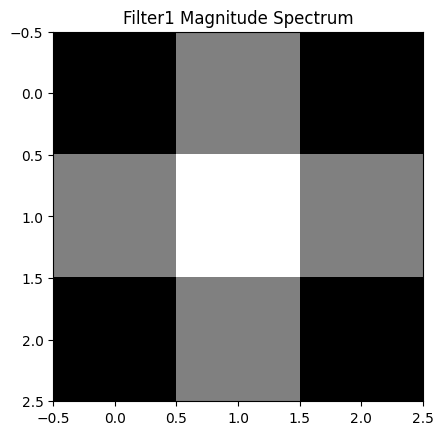

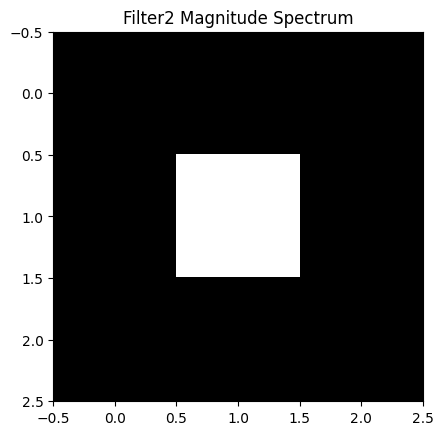

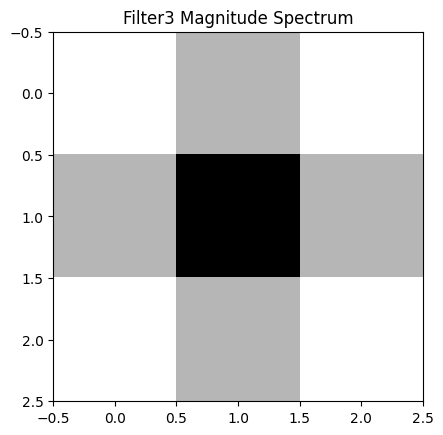

In [47]:
plot_image(filter1_dft, 'Filter1 Magnitude Spectrum')
plot_image(filter2_dft, 'Filter2 Magnitude Spectrum')
plot_image(filter3_dft, 'Filter3 Magnitude Spectrum')


4.1.2. Perform 2D DFT on grayscale Lena, Barbara, F16, and Baboon images. Display the magnitude of the DFT image with and without shifting and with and without logarithmic. Display and discuss the results. Also, examine in which frequency range the DFT coefficients have large magnitudes and explain why?

In [20]:
def DFT_log_shift(image):
    dft = DFT(image)

    # Compute the magnitude of the DFT coefficients
    magnitude_spectrum = cv2.magnitude(dft[:, :, 0], dft[:, :, 1])

    # Shift the zero-frequency component to the center of the image
    dft_shift = np.fft.fftshift(dft)

    # Compute the magnitude of the DFT coefficients
    magnitude_spectrum_shifted = cv2.magnitude(
        dft_shift[:, :, 0], dft_shift[:, :, 1])

    return magnitude_spectrum, magnitude_spectrum_shifted


In [21]:
def plot_result(magnitude_spectrum, magnitude_spectrum_shifted):

    # Plot the magnitude of the DFT coefficients with shifting and without logarithmic transformation
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(magnitude_spectrum_shifted, cmap='gray')
    plt.title('Magnitude Spectrum (Shifted)'), plt.xticks([]), plt.yticks([])

    # Plot the magnitude of the DFT coefficients without shifting and without logarithmic transformation
    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()

    # Plot the magnitude of the DFT coefficients with shifting and with logarithmic transformation
    magnitude_spectrum_shifted = np.log(magnitude_spectrum_shifted)
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(magnitude_spectrum_shifted, cmap='gray')
    plt.title('Magnitude Spectrum (Shifted & Logarithmic)'), plt.xticks(
        []), plt.yticks([])

    # Plot the magnitude of the DFT coefficients without shifting and with logarithmic transformation
    magnitude_spectrum = np.log(magnitude_spectrum)
    plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum (Logarithmic)'), plt.xticks(
        []), plt.yticks([])
    plt.show()


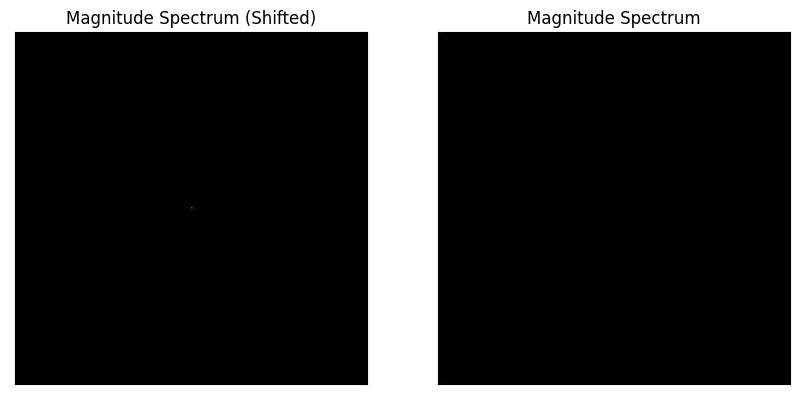

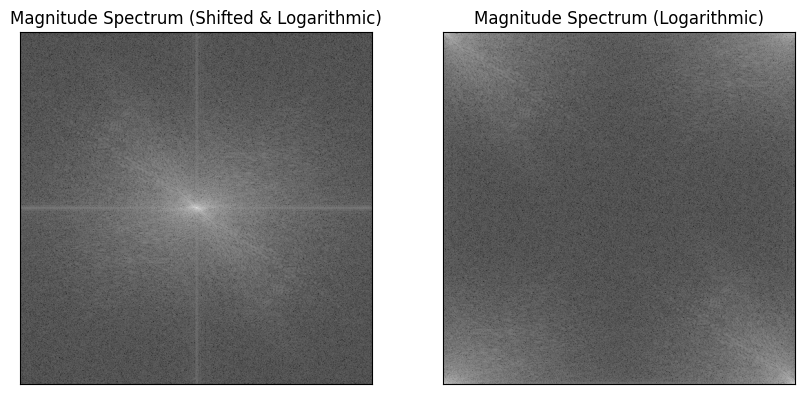

(512, 512)


In [38]:
magnitude_spectrum, magnitude_spectrum_shifted = DFT_log_shift(lena)
plot_result(magnitude_spectrum, magnitude_spectrum_shifted)


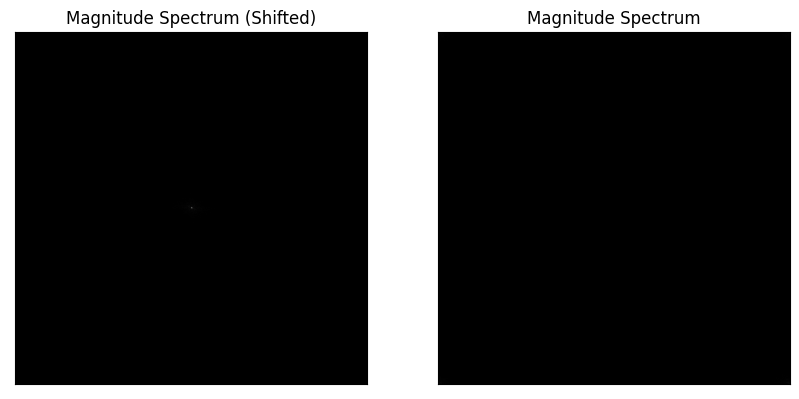

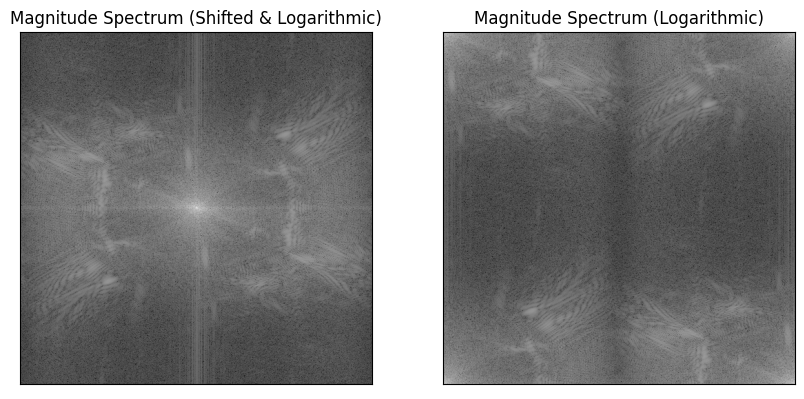

In [23]:
magnitude_spectrum, magnitude_spectrum_shifted = DFT_log_shift(Barbara)
plot_result(magnitude_spectrum, magnitude_spectrum_shifted)



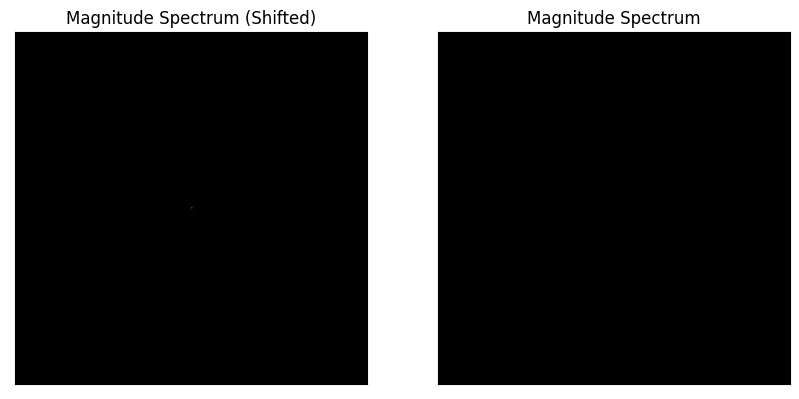

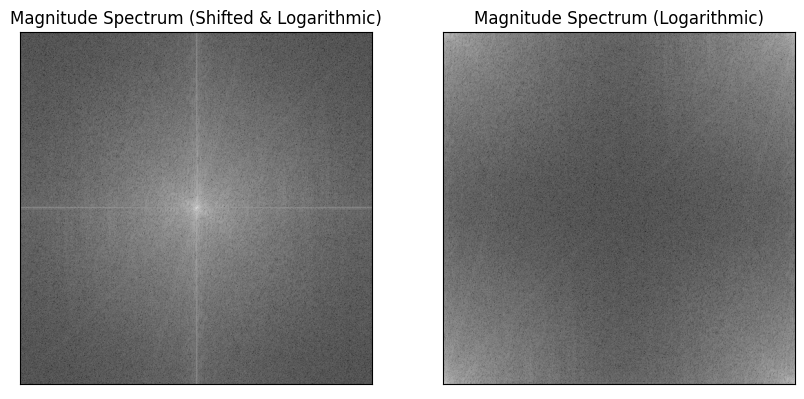

In [29]:
magnitude_spectrum, magnitude_spectrum_shifted = DFT_log_shift(F16)
plot_result(magnitude_spectrum, magnitude_spectrum_shifted)


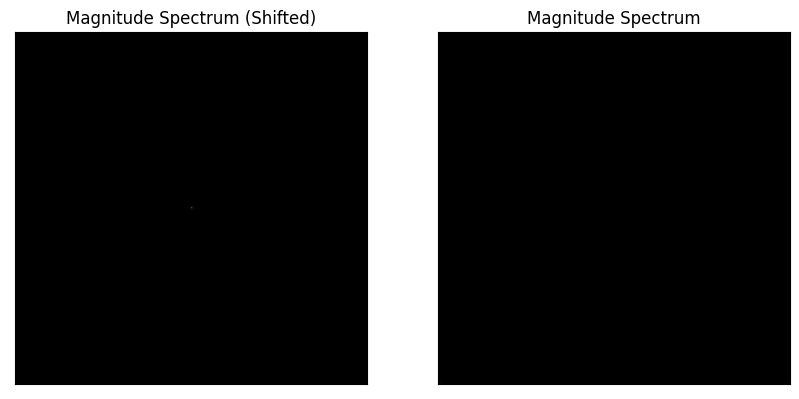

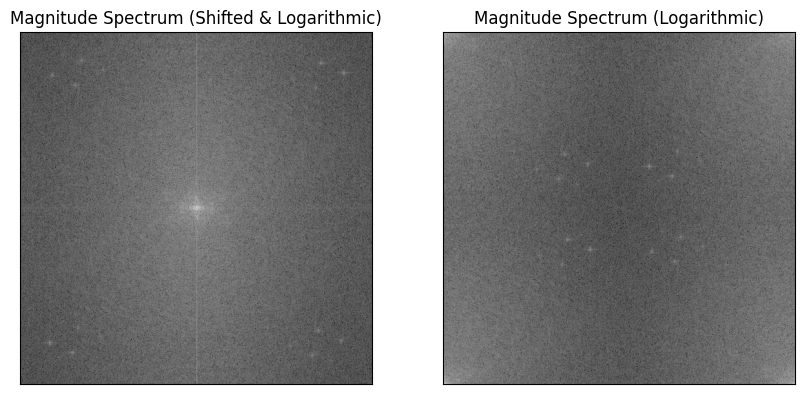

In [30]:
magnitude_spectrum, magnitude_spectrum_shifted = DFT_log_shift(Baboon)
plot_result(magnitude_spectrum, magnitude_spectrum_shifted)

4.2. Filtering

4.2.1. *Use DFT function to compute the linear convolution of an image 𝐹(𝑚,𝑛) with a filter 𝐻(𝑚,𝑛). Let the convolved image be denoted by 𝑌(𝑚,𝑛). Firstly, suppose the image size is 256×256 and the filter size is 11×11; What is the required size of the DFT to obtain the convolution of these two? Explain the exact steps to obtain the convolution result. Secondly, suppose we use a 256×256 point DFT algorithm for 𝐹(𝑚,𝑛) and 𝐻(𝑚,𝑛), and obtain 𝑍(𝑚,𝑛) as 𝑍 = 𝐼𝐷𝐹𝑇 (𝐷𝐹𝑇(𝑋).∗𝐷𝐹𝑇(𝐻)). The DFT and IDFT in this equation are both 256×256 points. For what values of (𝑚,𝑛) does 𝑍(𝑚,𝑛) equal 𝑌(𝑚,𝑛)?

You can find a complete description for this problem in the report file which is available in VU.